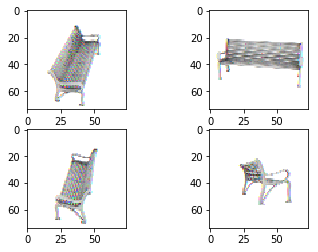

In [7]:
import torch
from vis_tools import *
from lsm import LSM

from shapenet_pytorch import ShapeNetDataset
from IPython.display import display
from IPython.core.display import HTML

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
#device = 'cpu'

vox_dir =  'data/shapenet_release/voxels/modelVoxels64'
im_dir = 'data/shapenet_release/renders'
split_file = './splits.json'

categories = ['bench']
dataset = ShapeNetDataset(im_dir, vox_dir, 4, 64, split_file, train=False, categories=categories)

imgs, vox, K, R = dataset[0]



# LSM model
lsm = LSM(device)

lsm.load_state_dict(torch.load('checkpoints/experiment_bench/best_model.pth'))
lsm.eval()

#imgs = imgs.type(torch.FloatTensor).to(device)
imgs_torch = torch.Tensor(imgs).unsqueeze(0).to(device)
#vox = vox.type(torch.FloatTensor).to(device)
#K = K.type(torch.FloatTensor).to(device)
K = torch.Tensor(K).to(device)
#R = R.type(torch.FloatTensor).to(device)
R = torch.Tensor(R).to(device)
K = K.view(-1, 3, 3)
R = R.view(-1, 3, 4)
vox_pred = lsm(imgs_torch, K, R)
vol_pred = vox_pred.squeeze()
pts, cols = voxel2pts(vol_pred.cpu().detach().numpy(), thresh=0.4)
display(plot_points(pts, cols, size=0.4, axis=False, title=None, html_out='test1.html'))

#print("imgs shape" + str(imgs.shape))
#print("imgs type" + str(type(imgs)))
vol = vox.squeeze()
pts, cols = voxel2pts(vol, thresh=0.4)
display(plot_points(pts, cols, size=0.4, axis=False, title=None, html_out='test2.html'))
plot_images(imgs, 'test.png')
